In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import colors
from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams["figure.figsize"] = (15,15)


In [5]:
def plot_cov_ellipse(cov, pos, volume=.5, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an ellipse enclosing *volume* based on the specified covariance
    matrix (*cov*) and location (*pos*). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        volume : The volume inside the ellipse; defaults to 0.5
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
    """

    from scipy.stats import chi2
    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

TypeError: unsupported operand type(s) for +: 'int' and 'map'

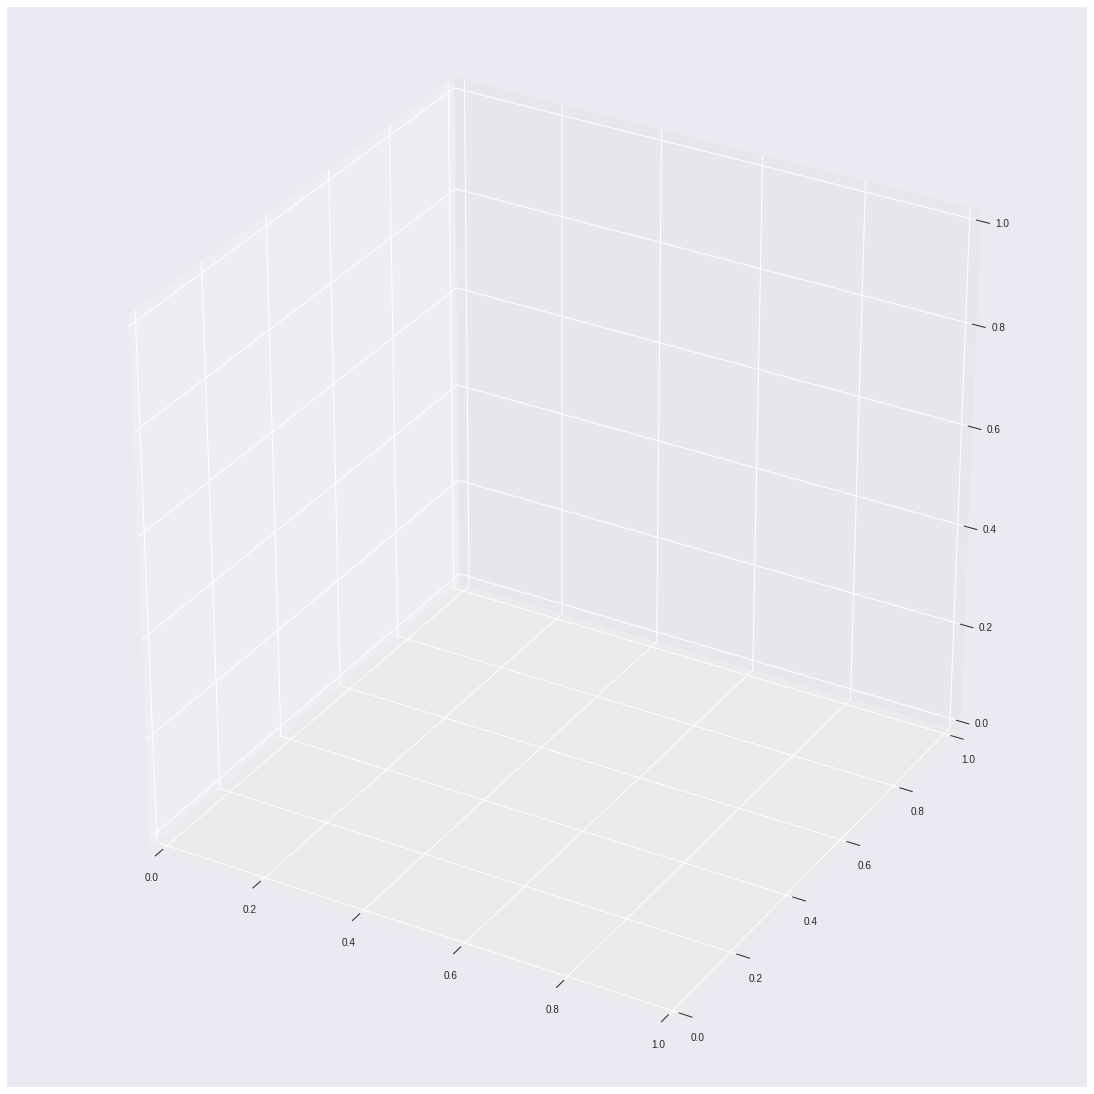

In [57]:
# Distribution parameters
mean_1 = [-5, -5]
mean_2 = [5, 5]
sigma_1 = 3.0
sigma_2 = 3.0
rho = -0.8
cov_1 = [[sigma_1**2, rho*sigma_1*sigma_2], [rho*sigma_1*sigma_2, sigma_2**2]]
cov_2 = [[1.5, 0.2], [0.2, 2.5]]  # diagonal covariance


fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(-8, 8, 0.25)
y = np.arange(-8, 8, 0.25)
X, Y = np.meshgrid(x, y)



p1 = multivariate_normal(mean=mean_1, cov=cov_1)
p2 = multivariate_normal(mean=mean_2, cov=cov_2)
Z1 = []
Z2 = []
for i in x:
    res = []
    for j in y:
        res.append((i, j))
    Z1.append(list(p1.pdf(res)))
    Z2.append(list(p2.pdf(res)))

#Z = map(lambda x : max(Z1[x],Z2[x]), range(len(Z1)))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="hot")

# print X
# plt.plot(x_1, y_1, 'o', color='blue', alpha=0.2,)
# plt.plot(x_2, y_2, 'o', color='red', alpha=0.2,)
# plot_cov_ellipse(cov_1, mean_1)
# plot_cov_ellipse(cov_2, mean_2)
# plt.axis('equal')